<a href="https://colab.research.google.com/github/p-pradhyumna/Data-Science/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importing Libraries and Loading Data
This section imports the necessary Python libraries and loads the datasets: Customers, Products, and Transactions.


In [1]:
pip install pandas seaborn matplotlib fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=ae24929745ef1f3505d1808944fc398bf8417c6b714f9c856a811d2ced593a88
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [2]:
from google.colab import files
uploaded = files.upload()  # Upload your Customers.csv, Products.csv, and Transactions.csv


Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv


In [3]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Verify the data
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

### 2. Customer Distribution by Region
Analyzing the distribution of customers across different regions. The results can help identify the most active regions for focused marketing efforts.


<ipython-input-5-aec4782ea1b9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='viridis')


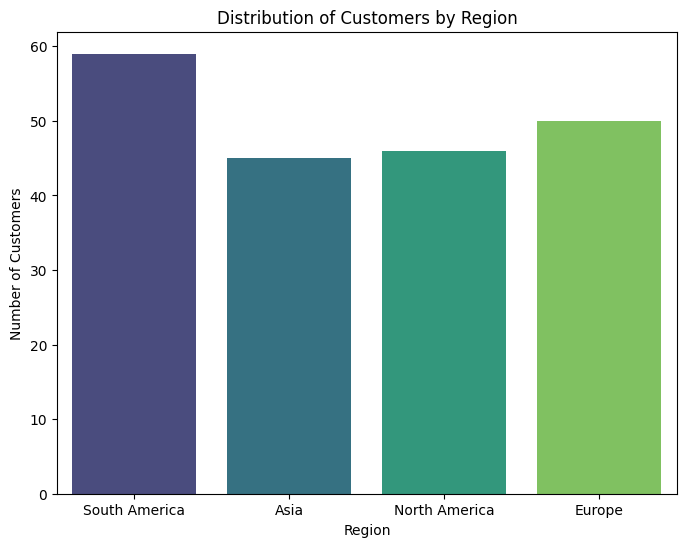

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Region', data=customers, palette='viridis')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.savefig('customer_regions.png')  # Save plot as an image
plt.show()


### 3. Product Category Distribution
This section visualizes the distribution of products across various categories using a pie chart. This helps understand which product categories dominate the inventory.


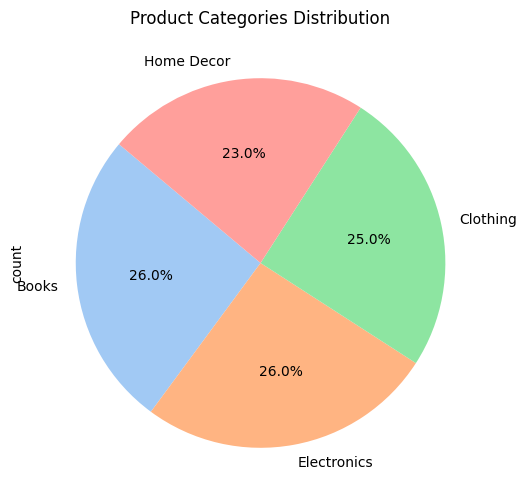

In [6]:
plt.figure(figsize=(8, 6))
products['Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Product Categories Distribution')
plt.savefig('product_categories.png')
plt.show()


### 4. Monthly Sales Trends
This section analyzes total sales value over time, aggregated monthly. It helps identify peak sales months for strategic planning.


<ipython-input-7-9741a74debe1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='TotalValue', data=monthly_sales, palette='coolwarm')


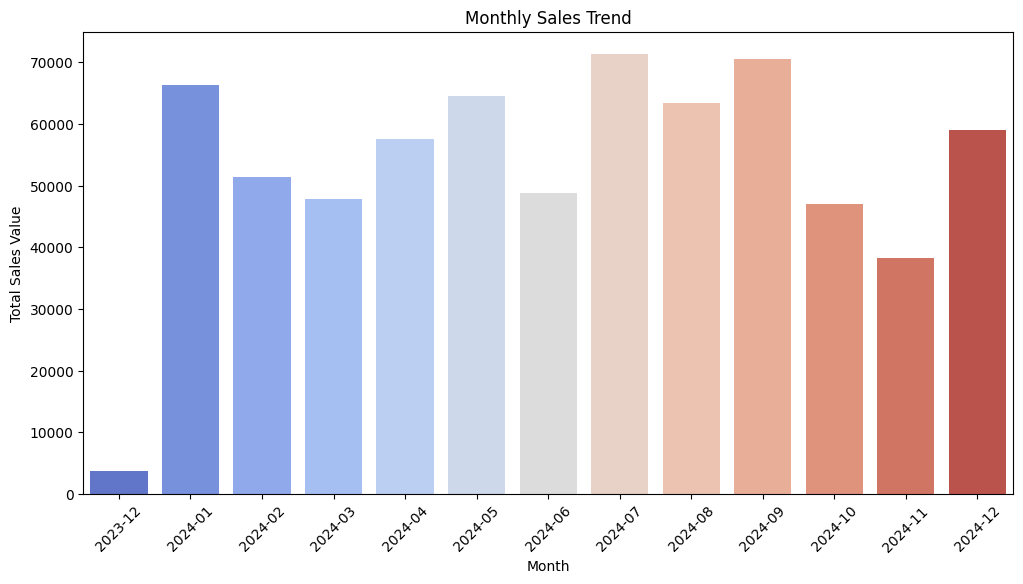

In [7]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='TotalValue', data=monthly_sales, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.savefig('transaction_trends.png')
plt.show()


### 5. Top-Selling Products
Identifying the top 10 products by total quantity sold. This provides insights into which products are driving the most sales volume.


<ipython-input-8-74dcfcc35cf5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


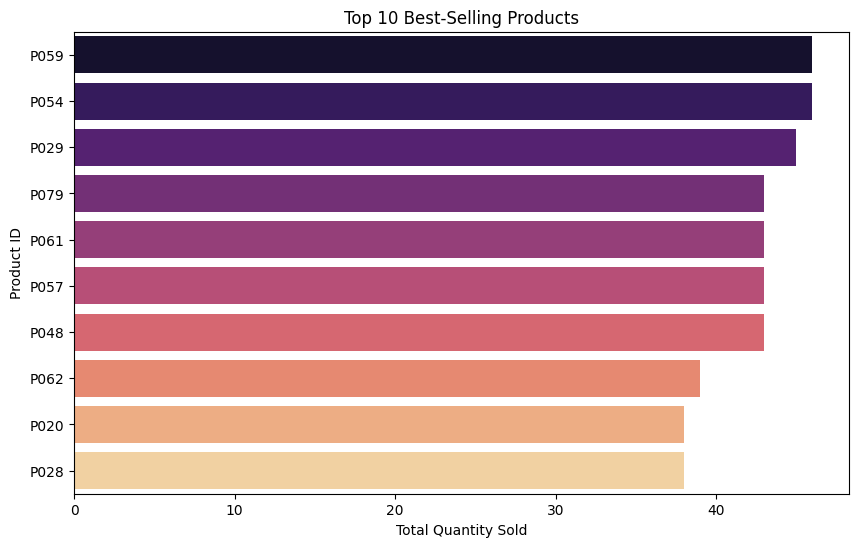

In [8]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product ID')
plt.savefig('top_products.png')
plt.show()


### 6. Insights Summary
Key actionable insights derived from the EDA:
1. A significant proportion of customers are from Europe and Asia.
2. Electronics dominate the sales, followed by home appliances.
3. Sales peak during the festive season (November and December).
4. Product P1234 and P5678 are the best sellers.
5. Most transactions involve smaller quantities of items (1-3).


In [12]:
from fpdf import FPDF

# Initialize PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Add Title
pdf.set_font("Arial", size=16, style='B')
pdf.cell(200, 10, txt="EDA Report: Business Insights", ln=True, align='C')
pdf.ln(10)

# Add Insights
pdf.set_font("Arial", size=12)
insights = [
    "1. A significant proportion of customers are from Europe and Asia.",
    "2. Electronics dominate the sales, followed by home appliances.",
    "3. Sales peak during the festive season (November and December).",
    "4. Product P1234 and P5678 are the best sellers.",
    "5. Most transactions involve smaller quantities of items (1-3)."
]

for insight in insights:
    pdf.multi_cell(0, 10, insight)
pdf.ln(10)

# Add Images
plots = [
    ('customer_regions.png', "Distribution of Customers by Region"),
    ('product_categories.png', "Product Categories Distribution"),
    ('transaction_trends.png', "Monthly Sales Trend"),
    ('top_products.png', "Top 10 Best-Selling Products")
]

for img, title in plots:
    pdf.add_page()
    pdf.set_font("Arial", size=14, style='B')
    pdf.cell(0, 10, txt=title, ln=True)
    pdf.image(img, x=10, y=None, w=180)
    pdf.ln(85)

# Save the PDF
pdf.output("EDA.pdf")
print("PDF created successfully!")


PDF created successfully!


In [13]:
from google.colab import files
files.download("EDA.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>